<a href="https://colab.research.google.com/github/mariachurches/PythonIA/blob/main/PracticaFinal/01MIAR_ACT_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#01MIAR - Actividad Final

###Autor: María Iglesias Veiga

Indice:
1. Descripción del proyecto y objetivos
2. Preparación del entorno
3. Preparación de los datos

  3.1 Carga del dataset

  3.2 Comprensión de los datos
  
  3.3 Limpieza y optimización de datos
4. Análisis general 
5. Exploración de los datos 
6. Concusiones
7. Trabajo futuro


## 1. Descripción del proyecto y objetivos
En esta actividad se pretende demostrar el conocimiento obtenido en las clases, teniendo como objetivo la exploración, tratamiento, evaluación y visualización de un conjunto de datos a través del uso de distintas librerias de Python.

El conjunto de datos seleccionado es heart_2020_cleaned.csv, obtenido de la siguiente fuente: https://www.kaggle.com. Este dataset contiene un total de 319795 intancias, compuestas por 18 atributos:
- 9 de carácter booleano: Smoking, AlcoholDrinking, DiffWalking, Asthma, KidneyDisease, SkinCancer, PhysicalActivity, Diabetic, Stroke.
- 5 de carácter linguistico: Sex, Age-Category, Race, GenHealth.
- 4 de carácter numérico: SleepTime, MentalHealth, PhysicalHealth, BMI.

El objetivo principal es conseguir determinar que atributos de los anteriormente comentados son factores de riesgo más significativos a la hora de sufrir una enfermedad cardiaca y determinar aquellos atributos que no tengan influencia o tengan una influencia menor sobre este hecho.

## 2. Preparación del entorno
Gracias a google colab solo necesitaremos para tener un entorno totalemente preparado la importación de las librerías de Python necesarías para el desarrollo del presente proyecto.

In [166]:
#Librerias necesarias para el trabajo final
import sys
import numpy  as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from pandas import Series

##3. Preparación de los datos
En esta sección importaremos, prepararemos y entenderemos el conjunto de datos seleccionado para el posterior analisis del mismo.

###3.1 Carga del dataset

In [126]:
#Carga de datos
data_heart = pd.read_csv('/content/heart_2020_cleaned.csv')

In [127]:
#Comprobamos que los datos se hayan cargado correctamente
data_heart.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


### 3.2 Comprensión de los datos

In [128]:
data_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [129]:
print("Hay un total de %d instancias y %i atributos" % (data_heart.shape[0],data_heart.shape[1]), end='.\n')
display(data_heart)

Hay un total de 319795 instancias y 18 atributos.


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [130]:
for atributo in data_heart.columns:
  print(f"Los posibles valores del atributo {atributo} son {data_heart[atributo].unique()} \n")

Los posibles valores del atributo HeartDisease son ['No' 'Yes'] 

Los posibles valores del atributo BMI son [16.6  20.34 26.58 ... 62.42 51.46 46.56] 

Los posibles valores del atributo Smoking son ['Yes' 'No'] 

Los posibles valores del atributo AlcoholDrinking son ['No' 'Yes'] 

Los posibles valores del atributo Stroke son ['No' 'Yes'] 

Los posibles valores del atributo PhysicalHealth son [ 3.  0. 20. 28.  6. 15.  5. 30.  7.  1.  2. 21.  4. 10. 14. 18.  8. 25.
 16. 29. 27. 17. 24. 12. 23. 26. 22. 19.  9. 13. 11.] 

Los posibles valores del atributo MentalHealth son [30.  0.  2.  5. 15.  8.  4.  3. 10. 14. 20.  1.  7. 24.  9. 28. 16. 12.
  6. 25. 17. 18. 21. 29. 22. 13. 23. 27. 26. 11. 19.] 

Los posibles valores del atributo DiffWalking son ['No' 'Yes'] 

Los posibles valores del atributo Sex son ['Female' 'Male'] 

Los posibles valores del atributo AgeCategory son ['55-59' '80 or older' '65-69' '75-79' '40-44' '70-74' '60-64' '50-54'
 '45-49' '18-24' '35-39' '30-34' '25-29'] 

Los 

###3.3 Limpieza y optimización de datos

In [131]:
#Comprobar si existen valores nulos
print(f"Número total de filas = {len(data_heart)}")
print(data_heart.isna().sum())

if data_heart.isnull().values.any():
  print("Existen valores nulos en el conjunto de datos")
else:
  print("No existen valores nulos en el conjunto de datos")

Número total de filas = 319795
HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64
No existen valores nulos en el conjunto de datos


Modificaremos la columna Diabetic para facilitar el futuro analisis asigando los siguientes valores:

0 - Tuvo diabetes

1 - Tuvo diabetes durante el embarazo

2 - No llego a tener diabetes pero estuvo en niveles cercanos

3 - No tuvo diabes

In [132]:
'''data_heart["Diabetic"] = data_heart["Diabetic"].replace("Yes"                         , 0)
data_heart["Diabetic"] = data_heart["Diabetic"].replace("Yes (during pregnancy)"      , 1)
data_heart["Diabetic"] = data_heart["Diabetic"].replace("No, borderline diabetes"     , 2)
data_heart["Diabetic"] = data_heart["Diabetic"].replace("No"                          , 3)'''

'data_heart["Diabetic"] = data_heart["Diabetic"].replace("Yes"                         , 0)\ndata_heart["Diabetic"] = data_heart["Diabetic"].replace("Yes (during pregnancy)"      , 1)\ndata_heart["Diabetic"] = data_heart["Diabetic"].replace("No, borderline diabetes"     , 2)\ndata_heart["Diabetic"] = data_heart["Diabetic"].replace("No"                          , 3)'

## 4. Análisis y exploración de los datos

### 4.1 Análisis estadístico

Primero vamos a hacer una análisis de las variables numéricas

In [133]:
display(data_heart.describe())

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


Podemos ver como el atributo describe nos da gran información del dataset, estan información la podemos resumir en los siguientes puntos:
- Podemos ver como los atributos PhysicalHealth y MentalHealth presentan una mayor desviación estandar, lo que nos indica que los datos suelen ser más dispares entre pacientes. En cambio podemos ver como el atributo SleepTime tiene datos cercanos a la media en la mayoria de pacientes ya que su desviación estandar es tan solo 1,43. Esta conclusión se puede sacar también del atributo BMI ya que aunque a simple vista parezca que la desviación estandar es alta (6,3561) el rango entre el máximo valor que llega a alcanzar (94,85) y el minimo (12,02) es mucho más amplio que en los casos de los atributos PhysicalHealth y MentalHealth que van desde 0 hasta 30.
- Relativo al Indice de Masa Corportal (BMI) podemos ver como la media de los datos nos da 28,3253, este valor se encuentra en el rango de sobrepeso cercano a la obesidad, lo que nos indica que la mayoria de pacientes que sufrieron un ataque al corazón tenían un indice de masa corporal bastante superior al recomendado.
- En el caso de la salud física y mental podemos ver como la mayoría de pacientes solían estar entre 3 y 4 días con problemas en estos aspectos.
- En el caso de las horas de dormir, la mayoría de pacientes dormían 7 horas diarias. 

A continuación, analizaremos las variables categóricas, añadiendo en una fila el porcentaje de apariencias del dato con mayor frecuencia para facilitar su interpretabilidad

In [134]:
estadistica_categorica = data_heart.describe(include=["object"] , exclude=["float64"])
porcentaje = (estadistica_categorica.iloc[3]*100)/estadistica_categorica.iloc[0]
indices = list(estadistica_categorica.index)
indices.append('%')
estadistica_categorica.loc[int(estadistica_categorica.shape[0] + 1)] = porcentaje
estadistica_categorica.index = indices
display(estadistica_categorica)

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
count,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795
unique,2,2,2,2,2,2,13,6,4,2,5,2,2,2
top,No,No,No,No,No,Female,65-69,White,No,Yes,Very good,No,No,No
freq,292422,187887,298018,307726,275385,167805,34151,245212,269653,247957,113858,276923,308016,289976
%,91.440454,58.752326,93.190325,96.22602,86.112979,52.472678,10.679029,76.677872,84.32058,77.536234,35.603433,86.593912,96.316703,90.675589


Observando el resultado obtenido sacamos las siguientes conclusiones:
- Hay variables que no parecen ser significativas para tener una enfermedad cardiaca como son:
> -   Haber tenido una enfermedad cardiaca previa ya que el 91,44% de pacientes no la habia tenido antes
> -   Beber alcohol de forma continuada, ya que el 93,19% de los pacientes no tenía el habito de beber.
> - Haber tenido un derrame cerebral, ya que el 96,22% de los pacientes no lo había sufrido.
> - Tener asma, ya que el 86,593% no lo padecía.
> - Tener una enfermedad renal va que el 96,3167% de las personas no lo padecían.
> - Tener cancer de piel, ya que el 90,67% no lo padecian.
> - El sexo, ya que el 52% son mujeres y el 48% hombres.

- Por otro lado podemos observar ciertas variables que incitan a pensar que son significativas en base a su ocurrencia:
> -   El 58,75% de los pacientes no fumaban, lo que deja ver que el 41,25% fumaban. La OMS en 2021 declaro que en España el porcentaje de fumadores era de un 22% y 6,12% a nivel mundial, valores significativamente inferiores al 41,25% de fumadores que padecen enfermedades cardiácas lo que nos hace pensar en una correlación.
> -   El 10,67% de pacientes se encuentran entre los 65-69, teniendo en cuenta que los rangos de edad se han dividido en 13 categorías este 10,67% es bastante significativo.
> - El 76,67% de los pacientes eran de raza blanca, que teniendo en cuenta que la raza se ha dividido en 6 grupos ['White' 'Black' 'Asian' 'American Indian/Alaskan Native' 'Other' 'Hispanic'] este valor es muy significativo .


### 4.2 Visualización y exploración de los datos

Uno de los aspectos relevantes a analizar de las conclusiones obtenidas en el apartado anterior es la edad de los pacientes. Vamos a comenzar analizando visualmente si exite una tendencia de edad con mayor predisposición.

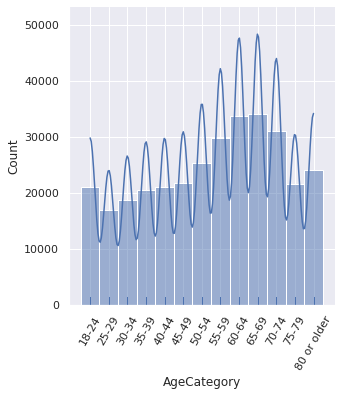

In [136]:
sns.set(rc = {'figure.figsize':(8,20)})
sns.displot(data_heart.sort_values(['AgeCategory'],ascending=True)['AgeCategory'], kde=True, bins=12, rug=True)
plt.xticks(rotation=60)
plt.show()

Como podemos observar los datos nos indican que la poblacion predominante a padecer una enfermedad cardiaca se encuentran entre los 55 y los 74 años.

Uno de los factores de riesgos conocidos para las enfermedades cardiacas es el nivel de colesterol, en vista a los resultados anteriores vamos a cargar un dataset con niveles de colesterol de diferentes personas y vamos a agruparlos por los mismos grupos de edad que los de nuestro dataset inicial. Con ello se quiere comprobar si los niveles de colesterol es parte de la consecuencia de que el grupo de edad entre los 55-74 años tengan más predisposición a tener enfermedades cardiacas. 

In [186]:
#Carga de datos
data_c = pd.read_csv('/content/heart.csv')
data_c.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,56,M,ASY,120,85,0,Normal,140,N,0.0,Up,0
1,52,M,ATA,140,100,0,Normal,138,Y,0.0,Up,0
2,56,M,ASY,120,100,0,Normal,120,Y,1.5,Flat,1
3,69,M,ASY,140,110,1,Normal,109,Y,1.5,Flat,1
4,76,M,NAP,104,113,0,LVH,120,N,3.5,Down,1


In [187]:
#Comprobamos que no existan valores nulos
#Comprobar si existen valores nulos
print(f"Número total de filas = {len(data_c)}")
print(data_c.isna().sum())

if data_c.isnull().values.any():
  print("Existen valores nulos en el conjunto de datos")
else:
  print("No existen valores nulos en el conjunto de datos")

Número total de filas = 746
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64
No existen valores nulos en el conjunto de datos


In [188]:
data_c_clean = data_c.loc[:,['Age', 'Cholesterol']]

In [210]:
index = data_heart.sort_values(['AgeCategory'],ascending=True)['AgeCategory'].unique()

values_c = []
for i in range(len(index)):
  if i==len(index)-1:
    group = data_c_clean[data_c_clean.Age.between(int(index[i].split(' ')[0]), int(data_c.Age.max()))].mean()
  else:
    group = data_c_clean[data_c_clean.Age.between(int(index[i].split('-')[0]), int(index[i].split('-')[1]))].mean()

  if group.isnull().any(): 
    values_c.append(0)
  else:
    values_c.append(group['Cholesterol'])

print(values_c)

[0, 210.5, 241.26666666666668, 231.7058823529412, 245.4090909090909, 238.5631067961165, 245.9251700680272, 247.19871794871796, 249.86274509803923, 256.92727272727274, 233.22222222222223, 217.57142857142858, 0]


In [233]:
new_data = { 'AgeCategory' : index, 'Choresterol': values_c}
df_c = pd.DataFrame(new_data)

data_heart_by_age = pd.DataFrame(data_heart.groupby('AgeCategory').mean())

In [234]:
combined_dataset = data_heart_by_age.merge(df_c, on='AgeCategory', how='inner') # parametro 'on' define la columna pivote
display(combined_dataset)

,AgeCategory,BMI,PhysicalHealth,MentalHealth,SleepTime,Choresterol
0,18-24,25.762770,1.698965,6.152535,7.186432,0.000000
1,25-29,27.688610,1.802241,5.729106,6.986435,210.500000
2,30-34,28.440007,2.018344,5.292540,6.872660,241.266667
3,35-39,28.838634,2.241606,5.049781,6.854939,231.705882
4,40-44,29.199764,2.574836,4.675188,6.876940,245.409091
5,45-49,29.487189,3.020834,4.385710,6.904043,238.563107
6,50-54,29.425097,3.607596,4.321763,6.924159,245.925170
7,55-59,29.098977,4.027422,4.055953,6.965487,247.198718
8,60-64,28.821778,4.317728,3.550555,7.059105,249.862745
9,65-69,28.674776,3.854792,2.887587,7.202220,256.927273


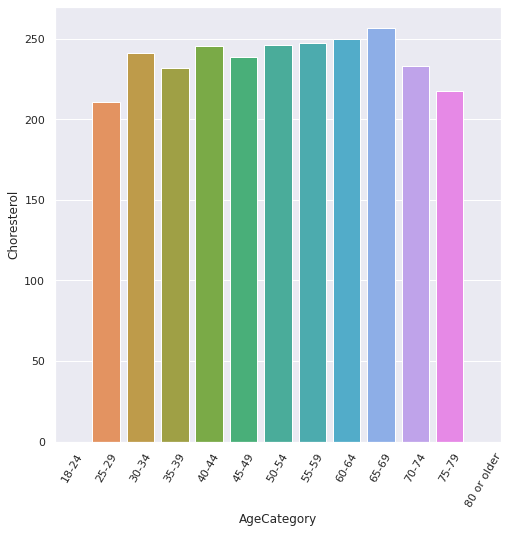

In [244]:
sns.set(rc = {'figure.figsize':(8,8)})
ax = sns.barplot(x='AgeCategory', y='Choresterol', data=combined_dataset)
plt.xticks(rotation=60)
plt.show()

Podemos ver como a excepción del grupo comprendido entre los años 40-44,  los grupos con mayor nivel de colesterol son los comprendidos entre 50-69 años, muy cercano al intervalo de edades con más personas con enfermedades cardiacas que era entre los 55 y los 74 años de edad. Por lo que podemos ver uno de los factores que ocasionen que ese sea el intervalo de edad más propenso a sufrir una enfermedad cardiaca.

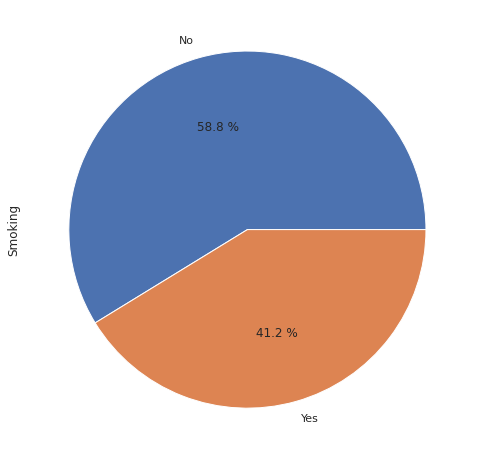

In [137]:
#Visualización de los datos
data_heart["Smoking"].value_counts().plot(kind='pie', autopct="%0.1f %%")